<a href="https://colab.research.google.com/github/TSUParticleModelingGroup/DEFall2020/blob/master/Eulers2body2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

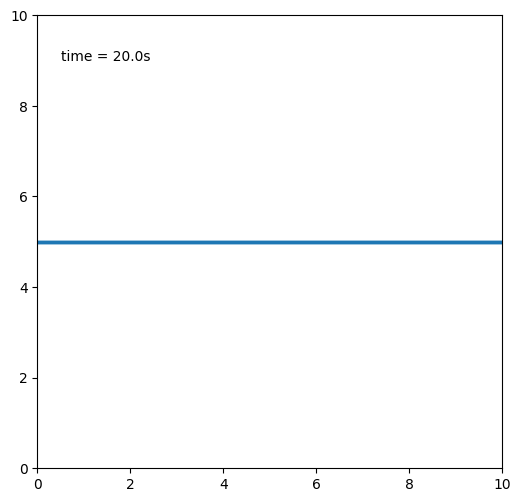

In [ ]:
import math
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

# Setting up the viewing window
fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(6, 6)

# Setting up axes of viewing window
ax = plt.axes(xlim=(0, 10), ylim=(0, 10))

# Time strart, stop and step size
tStart = 0.0
tStop = 20.0
dt = 0.05
steps = int((tStop - tStart)/dt)

# Initial positions and velocities
x1 = 2.0
y1 = 5.0
vx1 = 0.0
vy1 = 0.0

x2 = 4.0
y2 = 5.0
vx2 = 0.0
vy2 = 0.0

# Spring's natural length, strength, air resistance
L = 1.5
K = 50.0
C1 = 10.0
C2 = 10.0

# Masses of bodies
M1 = 10.0
M2 = 10.0

# Defining what the bodies look like
ball1 = plt.Circle((x1, y1), 0.75, fc='y')
ball2 = plt.Circle((x2, y2), 0.75, fc='b')

# Defining the line "spring" connecting the bodies
line = plt.Line2D((x1, x2), (y1, y2), lw=2.5)

# Formating the time text to appear in the window
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

# Initializing the animation
def init():
    line.set_xdata([])
    line.set_ydata([])
    ax.add_patch(ball1)
    ax.add_patch(ball2)
    ax.add_patch(line)
    time_text.set_text('')
    return ball1,ball2,line, time_text

def animate(i):
    global x1, y1, vx1, vy1, x2, y2, vx2, vy2
    # Finding the force
    dx = x2 - x1
    dy = y2 - y1
    d = math.sqrt(dx*dx + dy*dy)
    f = K*(d - L)
    
    # Euler's method on velocities
    vx1new = vx1 + (f/M1)*(dx/d)*dt
    vy1new = vy1 + (f/M1)*(dy/d)*dt
    vx2new = vx2 + (f/M2)*(-dx/d)*dt
    vy2new = vy2 + (f/M2)*(-dy/d)*dt

    # Euler's method on positions
    x1new = x1 + vx1*dt
    y1new = y1 + vy1*dt
    x2new = x2 + vx2*dt
    y2new = y2 + vy2*dt
    
    # Updating the velocities
    vx1 = vx1new
    vx2 = vx2new
    vy1 = vy1new
    vy2 = vy2new

    # Updating the positions
    x1 = x1new
    x2 = x2new
    y1 = y1new
    y2 = y2new
    
    # Adding the results to the animation
    ball1.center = (x1, y1)
    ball2.center = (x2, y2)
    line.set_xdata([x1,x2])
    line.set_ydata([y1,y2])
    time_text.set_text(time_template % (i*dt))
    return ball1,ball2,line, time_text
    
ani = animation.FuncAnimation(fig, animate, np.arange(dt, steps), interval=25, blit=True, init_func=init)

HTML(ani.to_html5_video())